# 유방암

- 2진 분류
- 베스트 모델 저장
- 자동 중단
- 그래프

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()

In [3]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
data.data.shape

(569, 30)

In [6]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
import numpy as np
import tensorflow as tf
tf.__version__

'2.1.0'

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [10]:
X = data.data
Y = data.target

In [11]:
X.shape, Y.shape

((569, 30), (569,))

In [12]:
model = Sequential([
    Dense(64, input_shape = (30,), activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(8, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1984      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam', metrics = ['accuracy'])

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [15]:
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [16]:
modelpath = MODEL_DIR + "final{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer_callback = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [17]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [18]:
history = model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=500,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer_callback])


Epoch 00001: val_loss improved from inf to 13.42468, saving model to ./model/final001-13.4247.hdf5

Epoch 00002: val_loss improved from 13.42468 to 11.80958, saving model to ./model/final002-11.8096.hdf5

Epoch 00003: val_loss improved from 11.80958 to 10.28355, saving model to ./model/final003-10.2836.hdf5

Epoch 00004: val_loss improved from 10.28355 to 8.91331, saving model to ./model/final004-8.9133.hdf5

Epoch 00005: val_loss improved from 8.91331 to 7.82251, saving model to ./model/final005-7.8225.hdf5

Epoch 00006: val_loss improved from 7.82251 to 6.86362, saving model to ./model/final006-6.8636.hdf5

Epoch 00007: val_loss improved from 6.86362 to 5.97820, saving model to ./model/final007-5.9782.hdf5

Epoch 00008: val_loss improved from 5.97820 to 5.15335, saving model to ./model/final008-5.1533.hdf5

Epoch 00009: val_loss improved from 5.15335 to 4.38392, saving model to ./model/final009-4.3839.hdf5

Epoch 00010: val_loss improved from 4.38392 to 3.68026, saving model to ./mo


Epoch 00106: val_loss improved from 0.45120 to 0.44910, saving model to ./model/final106-0.4491.hdf5

Epoch 00107: val_loss improved from 0.44910 to 0.44876, saving model to ./model/final107-0.4488.hdf5

Epoch 00108: val_loss improved from 0.44876 to 0.44584, saving model to ./model/final108-0.4458.hdf5

Epoch 00109: val_loss improved from 0.44584 to 0.43696, saving model to ./model/final109-0.4370.hdf5

Epoch 00110: val_loss improved from 0.43696 to 0.42505, saving model to ./model/final110-0.4251.hdf5

Epoch 00111: val_loss improved from 0.42505 to 0.41217, saving model to ./model/final111-0.4122.hdf5

Epoch 00112: val_loss improved from 0.41217 to 0.40099, saving model to ./model/final112-0.4010.hdf5

Epoch 00113: val_loss improved from 0.40099 to 0.39096, saving model to ./model/final113-0.3910.hdf5

Epoch 00114: val_loss improved from 0.39096 to 0.38238, saving model to ./model/final114-0.3824.hdf5

Epoch 00115: val_loss improved from 0.38238 to 0.37620, saving model to ./model/f


Epoch 00210: val_loss did not improve from 0.25668

Epoch 00211: val_loss did not improve from 0.25668

Epoch 00212: val_loss did not improve from 0.25668

Epoch 00213: val_loss did not improve from 0.25668

Epoch 00214: val_loss did not improve from 0.25668

Epoch 00215: val_loss did not improve from 0.25668

Epoch 00216: val_loss did not improve from 0.25668

Epoch 00217: val_loss did not improve from 0.25668

Epoch 00218: val_loss did not improve from 0.25668

Epoch 00219: val_loss did not improve from 0.25668

Epoch 00220: val_loss did not improve from 0.25668

Epoch 00221: val_loss did not improve from 0.25668

Epoch 00222: val_loss did not improve from 0.25668

Epoch 00223: val_loss did not improve from 0.25668

Epoch 00224: val_loss did not improve from 0.25668

Epoch 00225: val_loss did not improve from 0.25668

Epoch 00226: val_loss did not improve from 0.25668

Epoch 00227: val_loss did not improve from 0.25668

Epoch 00228: val_loss did not improve from 0.25668

Epoch 00229


Epoch 00348: val_loss did not improve from 0.23359

Epoch 00349: val_loss improved from 0.23359 to 0.23169, saving model to ./model/final349-0.2317.hdf5

Epoch 00350: val_loss did not improve from 0.23169

Epoch 00351: val_loss did not improve from 0.23169

Epoch 00352: val_loss improved from 0.23169 to 0.22992, saving model to ./model/final352-0.2299.hdf5

Epoch 00353: val_loss did not improve from 0.22992

Epoch 00354: val_loss did not improve from 0.22992

Epoch 00355: val_loss did not improve from 0.22992

Epoch 00356: val_loss did not improve from 0.22992

Epoch 00357: val_loss did not improve from 0.22992

Epoch 00358: val_loss did not improve from 0.22992

Epoch 00359: val_loss did not improve from 0.22992

Epoch 00360: val_loss improved from 0.22992 to 0.22968, saving model to ./model/final360-0.2297.hdf5

Epoch 00361: val_loss did not improve from 0.22968

Epoch 00362: val_loss did not improve from 0.22968

Epoch 00363: val_loss improved from 0.22968 to 0.22817, saving model 


Epoch 00505: val_loss did not improve from 0.20823

Epoch 00506: val_loss improved from 0.20823 to 0.20593, saving model to ./model/final506-0.2059.hdf5

Epoch 00507: val_loss did not improve from 0.20593

Epoch 00508: val_loss did not improve from 0.20593

Epoch 00509: val_loss improved from 0.20593 to 0.20530, saving model to ./model/final509-0.2053.hdf5

Epoch 00510: val_loss did not improve from 0.20530

Epoch 00511: val_loss did not improve from 0.20530

Epoch 00512: val_loss did not improve from 0.20530

Epoch 00513: val_loss did not improve from 0.20530

Epoch 00514: val_loss did not improve from 0.20530

Epoch 00515: val_loss improved from 0.20530 to 0.20473, saving model to ./model/final515-0.2047.hdf5

Epoch 00516: val_loss did not improve from 0.20473

Epoch 00517: val_loss did not improve from 0.20473

Epoch 00518: val_loss did not improve from 0.20473

Epoch 00519: val_loss did not improve from 0.20473

Epoch 00520: val_loss did not improve from 0.20473

Epoch 00521: val_


Epoch 00663: val_loss did not improve from 0.15558

Epoch 00664: val_loss improved from 0.15558 to 0.13772, saving model to ./model/final664-0.1377.hdf5

Epoch 00665: val_loss did not improve from 0.13772

Epoch 00666: val_loss did not improve from 0.13772

Epoch 00667: val_loss did not improve from 0.13772

Epoch 00668: val_loss did not improve from 0.13772

Epoch 00669: val_loss did not improve from 0.13772

Epoch 00670: val_loss did not improve from 0.13772

Epoch 00671: val_loss did not improve from 0.13772

Epoch 00672: val_loss did not improve from 0.13772

Epoch 00673: val_loss did not improve from 0.13772

Epoch 00674: val_loss did not improve from 0.13772

Epoch 00675: val_loss did not improve from 0.13772

Epoch 00676: val_loss did not improve from 0.13772

Epoch 00677: val_loss did not improve from 0.13772

Epoch 00678: val_loss did not improve from 0.13772

Epoch 00679: val_loss did not improve from 0.13772

Epoch 00680: val_loss did not improve from 0.13772

Epoch 00681: 


Epoch 00836: val_loss did not improve from 0.12301

Epoch 00837: val_loss did not improve from 0.12301

Epoch 00838: val_loss did not improve from 0.12301

Epoch 00839: val_loss did not improve from 0.12301

Epoch 00840: val_loss did not improve from 0.12301

Epoch 00841: val_loss did not improve from 0.12301

Epoch 00842: val_loss did not improve from 0.12301

Epoch 00843: val_loss did not improve from 0.12301

Epoch 00844: val_loss did not improve from 0.12301

Epoch 00845: val_loss did not improve from 0.12301

Epoch 00846: val_loss did not improve from 0.12301


In [19]:
del model

In [20]:
from tensorflow.keras.models import load_model

In [21]:
model = load_model('model/final746-0.1230.hdf5')

In [22]:
print("\n Accuracy: %.4f" % (model.evaluate(X, Y, verbose=2))[1])

569/569 - 0s - loss: 0.0930 - accuracy: 0.9561

 Accuracy: 0.9561


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
y_vloss=history.history['val_loss']
y_acc=history.history['accuracy']

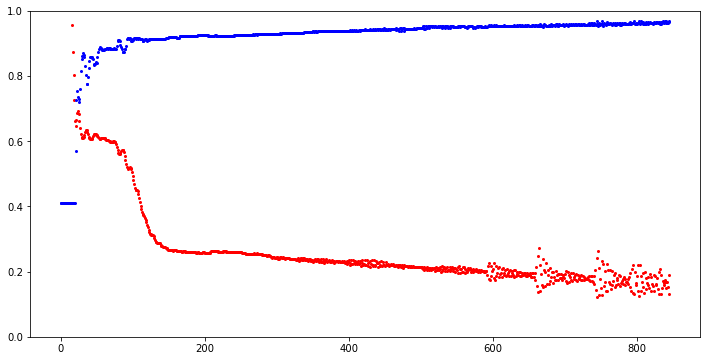

In [25]:
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,6))
plt.ylim((0, 1))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2)
plt.plot(x_len, y_acc, "o", c="blue", markersize=2)

plt.show()